In [71]:
import pandas as pd
import re
import string
import matplotlib
import nltk
#from nltk import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
# importing all necessery modules for word clouds
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karinahou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
yelp_reviews = pd.read_csv("../Data/yelp_review.csv")
yelp_business = pd.read_csv("../Data/yelp_business.csv")

In [4]:
yelp_reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
yelp_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [6]:
#read review text reviews with only 5 star ratings

#five_star_reviews = pd.DataFrame()
five_star_reviews = yelp_reviews.loc[(yelp_reviews['stars']==5)]
five_star_reviews = five_star_reviews.head(40000)
print(five_star_reviews.head())
print("5 Star Review Size", len(five_star_reviews))

                review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
5  HRPm3vEZ_F-33TYVT7Pebw  _4iMDXbXZ1p1ONG297YEAQ  8QWPlVQ6D-OExqXoaD2Z1g   
9  WF_QTN3p-thD74hqpp2j-Q  u0LXt3Uea_GidxRW1xcsfg  fDF_o2JPU8BR1Gya--jRIA   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
5      5  2014-09-24  Cycle Pub Las Vegas was a blast! Got a groupon...   
9      5  2016-04-06  Love this place!\n\nPeggy is great with dogs a...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0  

In [7]:
#read review text reviews with only 4 star ratings

four_star_reviews = yelp_reviews.loc[(yelp_reviews['stars']==4)]
four_star_reviews = four_star_reviews.head(40000)
print(four_star_reviews.head())
print("4 Star Review Size", len(four_star_reviews))

                 review_id                 user_id             business_id  \
3   IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4   L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   
6   ymAUG8DZfQcFTBSOiaNN4w  u0LXt3Uea_GidxRW1xcsfg  9_CGhHMz8698M9-PkVf0CQ   
7   8UIishPUD92hXtScSga_gw  u0LXt3Uea_GidxRW1xcsfg  gkCorLgPyQLsptTHalL61g   
10  PIsUSmvaUWB00qv5KTF1xA  u0LXt3Uea_GidxRW1xcsfg  z8oIoCT1cXz7gZP5GeU5OA   

    stars        date                                               text  \
3       4  2016-05-28  Love coming here. Yes the place always needs t...   
4       4  2016-05-28  Had their chocolate almond croissant and it wa...   
6       4  2012-05-11  Who would have guess that you would be able to...   
7       4  2015-10-27  Always drove past this coffee house and wonder...   
10      4  2013-05-01  This is currently my parents new favourite res...   

    useful  funny  cool  
3        0      0     0  
4        0      0     

In [8]:
#read review text reviews with only 3 star ratings

three_star_reviews = yelp_reviews.loc[(yelp_reviews['stars']==3)]
three_star_reviews = three_star_reviews.head(40000)
print(three_star_reviews.head())
print("3 Star Review Size", len(three_star_reviews))

                 review_id                 user_id             business_id  \
8   w41ZS9shepfO3uEyhXEWuQ  u0LXt3Uea_GidxRW1xcsfg  5r6-G9C4YLbC7Ziz57l3rQ   
11  PdZ_uFjbbkjtm3SCY_KrZw  u0LXt3Uea_GidxRW1xcsfg  XWTPNfskXoUL-Lf32wSk0Q   
13  lsoSqIrrDbQvWpMvsSj2xw  u0LXt3Uea_GidxRW1xcsfg  RtUvSWO_UZ8V3Wpj0n077w   
17  xdu8nXrbNKeaywCX79KZSw  u0LXt3Uea_GidxRW1xcsfg  PFPUMF38-lraKzLcTiz5gQ   
18  K7o5jDInfmX3cY5oH6ATNw  u0LXt3Uea_GidxRW1xcsfg  oWTn2IzrprsRkPfULtjZtQ   

    stars        date                                               text  \
8       3  2013-02-09  Not bad!! Love that there is a gluten-free, ve...   
11      3  2011-09-28  Server was a little rude.\n\nOrdered the calam...   
13      3  2012-12-03  Wanted to check out this place due to all the ...   
17      3  2010-09-15  Came here with my girlfriends one Sunday after...   
18      3  2012-09-23  Came here for a burger as one of my friends sa...   

    useful  funny  cool  
8        1      0     0  
11       5      0     

In [9]:
#read review text reviews with only 2 star ratings

two_star_reviews = yelp_reviews.loc[(yelp_reviews['stars']==2)]
two_star_reviews = two_star_reviews.head(40000)
print(two_star_reviews.head())
print("2 Star Review Size", len(two_star_reviews))

                 review_id                 user_id             business_id  \
26  y21Fom8a_SdAyC6I0v554w  u0LXt3Uea_GidxRW1xcsfg  zxJlg4XCHNoFy78WZPv89w   
40  Tv-_7d1sa-6cPTZ20exTLA  u0LXt3Uea_GidxRW1xcsfg  7Uti5EeAwm3drG14KVrE3Q   
53  Ny3gmyxodfnp4JK0Geaovg  u0LXt3Uea_GidxRW1xcsfg  P-nqq5kOv2wV2mB5To5elQ   
58  EY1mL968hGQt5xWgILX7gw  u0LXt3Uea_GidxRW1xcsfg  AF_VU15nNsqIg7-y9uiQug   
64  yWUdKhjq8QqZe6vai8W69w  u0LXt3Uea_GidxRW1xcsfg  rdn0vLw8Ln5_PBwRcE6BZw   

    stars        date                                               text  \
26      2  2011-09-28  a few years ago, this used to be the place to ...   
40      2  2010-03-31  Atmosphere for this restaurant is nice but ser...   
53      2  2010-09-15  Opened by Pickle Barrel, Glow is meant to be t...   
58      2  2011-01-06  Went with my friend as we had purchased the Gr...   
64      2  2012-10-18  Decided to give this place a try based on the ...   

    useful  funny  cool  
26       0      0     0  
40       8      0     

In [10]:
#read review text reviews with only 1 star ratings

one_star_reviews = yelp_reviews.loc[(yelp_reviews['stars']==1)]
one_star_reviews = one_star_reviews.head(40000)
print(one_star_reviews.head())
print("1 Star Review Size", len(one_star_reviews))

                 review_id                 user_id             business_id  \
12  x5oV6wm9_Pb1QQ6jkjDjwQ  u0LXt3Uea_GidxRW1xcsfg  13nKUHH-uEUXVZylgxchPA   
16  FKu4iU62EmWT6GZXPJ2sgA  u0LXt3Uea_GidxRW1xcsfg  fdnNZMk1NP7ZhL-YMidMpw   
19  WYDFJOBOl7cycd7gN-c_xA  u0LXt3Uea_GidxRW1xcsfg  zgQHtqX0gqMw1nlBZl2VnQ   
23  ypjtMQLKdAwKGRS-KU7oxA  u0LXt3Uea_GidxRW1xcsfg  hjk3ox7w1akbEuOgTJ03Bw   
31  z9e32TaBomM5uY7fHYqYKg  u0LXt3Uea_GidxRW1xcsfg  I8rveLd-dl81u6c8YqAxmw   

    stars        date                                               text  \
12      1  2011-02-16  I thought Tidy's Flowers had a great reputatio...   
16      1  2012-10-23  I too have been trying to book an appt to use ...   
19      1  2012-10-30  really excited to hear of this restaurant comi...   
23      1  2012-05-10  Food is very bland - not authentic at all.\n\n...   
31      1  2012-05-11  If you have not yet tried Wasabi - don't bothe...   

    useful  funny  cool  
12       9      0     1  
16       0      0     

In [11]:
#merging the review texts together to have one dataframe of 200k with equal amounts of review

#initialize empty dataframe
yelp_reviews_equal = pd.DataFrame()
yelp_reviews_equal = yelp_reviews_equal.append(five_star_reviews)
yelp_reviews_equal = yelp_reviews_equal.append(four_star_reviews)
yelp_reviews_equal = yelp_reviews_equal.append(three_star_reviews)
yelp_reviews_equal = yelp_reviews_equal.append(two_star_reviews)
yelp_reviews_equal = yelp_reviews_equal.append(one_star_reviews)

print(len(yelp_reviews_equal))

200000


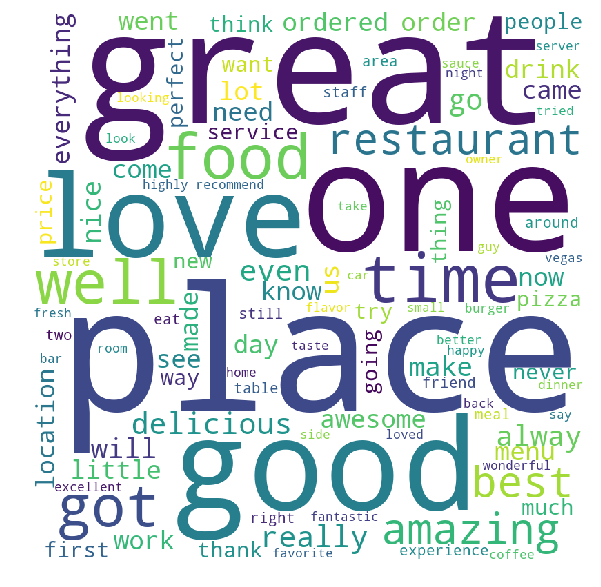

In [12]:
# Python program to generate WordCloud 

#word cloud for 10k of 5 star reviews
  
#yelp_reviews_test = pd.read_csv("../Data/yelp_review.csv", nrows = 10000) 
wc_five_star_reviews = five_star_reviews.head(10000)
                                                                             
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in wc_five_star_reviews.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                max_words = 100).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


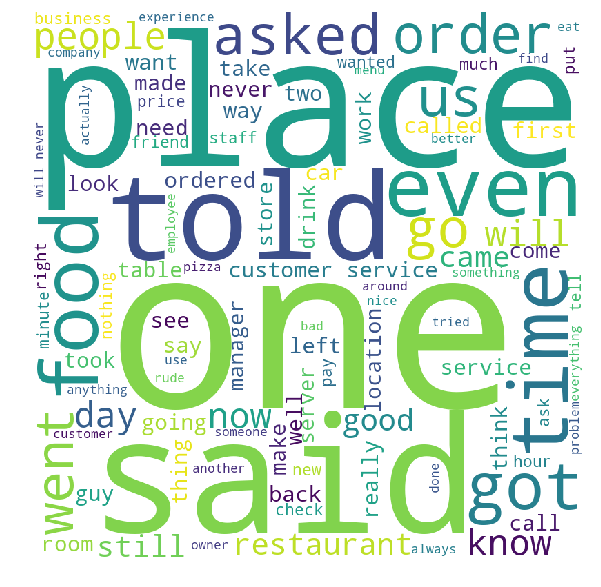

In [27]:
# Python program to generate WordCloud 

#word cloud for 10k of 1 star reviews
  
wc_one_star_reviews = one_star_reviews.head(10000)
                                                                             
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in wc_one_star_reviews.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                max_words = 100).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


In [28]:
yelp_reviews_equal.text.head()

0    Super simple place but amazing nonetheless. It...
1    Small unassuming place that changes their menu...
2    Lester's is located in a beautiful neighborhoo...
5    Cycle Pub Las Vegas was a blast! Got a groupon...
9    Love this place!\n\nPeggy is great with dogs a...
Name: text, dtype: object

In [29]:
#Removing punctuation from the reviews
remove_punctuation = yelp_reviews_equal['text'].str.replace('[^\w\s]','')

In [30]:
remove_punctuation.head()

0    Super simple place but amazing nonetheless Its...
1    Small unassuming place that changes their menu...
2    Lesters is located in a beautiful neighborhood...
5    Cycle Pub Las Vegas was a blast Got a groupon ...
9    Love this place\n\nPeggy is great with dogs an...
Name: text, dtype: object

In [31]:
#making the review text all lowercase
lowercase = remove_punctuation.str.lower()

In [32]:
lowercase.head()

0    super simple place but amazing nonetheless its...
1    small unassuming place that changes their menu...
2    lesters is located in a beautiful neighborhood...
5    cycle pub las vegas was a blast got a groupon ...
9    love this place\n\npeggy is great with dogs an...
Name: text, dtype: object

In [33]:
#removing all numbers from reviews
no_numbers = lowercase.str.replace(r'\d+', '')

In [34]:
no_numbers.head()

0    super simple place but amazing nonetheless its...
1    small unassuming place that changes their menu...
2    lesters is located in a beautiful neighborhood...
5    cycle pub las vegas was a blast got a groupon ...
9    love this place\n\npeggy is great with dogs an...
Name: text, dtype: object

In [35]:
#removing _ (underscores) from the review text
remove_ = no_numbers.str.replace('_', '')

In [36]:
remove_.head()

0    super simple place but amazing nonetheless its...
1    small unassuming place that changes their menu...
2    lesters is located in a beautiful neighborhood...
5    cycle pub las vegas was a blast got a groupon ...
9    love this place\n\npeggy is great with dogs an...
Name: text, dtype: object

In [37]:
#splitting each word into a list
split_white = remove_.str.split()

In [38]:
split_white.head()

0    [super, simple, place, but, amazing, nonethele...
1    [small, unassuming, place, that, changes, thei...
2    [lesters, is, located, in, a, beautiful, neigh...
5    [cycle, pub, las, vegas, was, a, blast, got, a...
9    [love, this, place, peggy, is, great, with, do...
Name: text, dtype: object

In [41]:
#removing all stop words (and, but, then, etc)
stop = stopwords.words('english')
stop_words = split_white.apply(lambda x: [item for item in x if item not in stop])
stop_words.head()

0    [super, simple, place, amazing, nonetheless, a...
1    [small, unassuming, place, changes, menu, ever...
2    [lesters, located, beautiful, neighborhood, si...
5    [cycle, pub, las, vegas, blast, got, groupon, ...
9    [love, place, peggy, great, dogs, great, job, ...
Name: text, dtype: object

In [42]:
#stemmer = SnowballStemmer("english")
#yelp_reviews['cleaned_text'] = stop_words.apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [43]:
#lemmatize the text and take it out of the list
lemmatizer = WordNetLemmatizer()
yelp_reviews_equal['cleaned_text'] = stop_words.apply(lambda x:' '.join([lemmatizer.lemmatize(y) for y in x])) # Lemmatize every word.


In [44]:
yelp_reviews_equal['cleaned_text'].head()

0    super simple place amazing nonetheless around ...
1    small unassuming place change menu every often...
2    lesters located beautiful neighborhood since k...
5    cycle pub la vega blast got groupon rented bik...
9    love place peggy great dog great job patience ...
Name: cleaned_text, dtype: object

In [45]:
yelp_reviews_equal.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,cleaned_text
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,super simple place amazing nonetheless around ...
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,small unassuming place change menu every often...
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,lesters located beautiful neighborhood since k...
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0,cycle pub la vega blast got groupon rented bik...
9,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0,love place peggy great dog great job patience ...


In [46]:
#checking for null values
yelp_reviews_equal.isnull().sum()

review_id       0
user_id         0
business_id     0
stars           0
date            0
text            0
useful          0
funny           0
cool            0
cleaned_text    0
dtype: int64

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
text_data = yelp_reviews_equal['cleaned_text']

In [49]:
#use tokenizer as an argument, get feautre names, n-gram range =  1

#Use count vect
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(text_data)
print(count_vect.get_feature_names()[:10])
print(X_train_counts.shape)



['aa', 'aaa', 'aaaaa', 'aaaaaaaaaaaaahhhhhhh', 'aaaaaaaaaaand', 'aaaaaaaaand', 'aaaaaaaannnnd', 'aaaaaaahhhhhh', 'aaaaaaall', 'aaaaaaand']
(200000, 179642)


In [52]:
vec = TfidfVectorizer(stop_words="english")

#vec.fit(yelp_reviews.cleaned_text)
vec.fit(yelp_reviews_equal.cleaned_text.values.astype('U'))
features = vec.transform(yelp_reviews_equal.cleaned_text)

print(features[:1])

  (0, 156772)	0.15021702895011288
  (0, 151351)	0.1899207251109786
  (0, 148017)	0.21360086279635987
  (0, 147429)	0.14906818821323517
  (0, 141563)	0.24063366115965143
  (0, 138419)	0.23309562040590845
  (0, 134292)	0.19936348414181357
  (0, 133594)	0.3957768071718175
  (0, 117602)	0.09596765974053964
  (0, 105030)	0.34191934239652266
  (0, 101599)	0.3184736878732779
  (0, 70359)	0.21953317924370302
  (0, 59396)	0.15476387028347705
  (0, 17815)	0.4831252674130877
  (0, 4333)	0.1783095269101236


In [60]:
#**word clouds**? most common words? (histogram for the words)

In [64]:
print(features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
print(yelp_reviews_equal.describe())

               stars         useful          funny           cool
count  200000.000000  200000.000000  200000.000000  200000.000000
mean        3.000000       1.451405       0.524750       0.495025
std         1.414217       5.869374       2.550743       2.462305
min         1.000000       0.000000       0.000000       0.000000
25%         2.000000       0.000000       0.000000       0.000000
50%         3.000000       0.000000       0.000000       0.000000
75%         4.000000       2.000000       0.000000       0.000000
max         5.000000    1456.000000     447.000000     245.000000


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(yelp_reviews_equal.cleaned_text)
print(X_tfidf.shape)


(200000, 179642)


In [77]:
print(tfidf_vect.get_feature_names()[:10])

['aa', 'aaa', 'aaaaa', 'aaaaaaaaaaaaahhhhhhh', 'aaaaaaaaaaand', 'aaaaaaaaand', 'aaaaaaaannnnd', 'aaaaaaahhhhhh', 'aaaaaaall', 'aaaaaaand']


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [10, 100, 10000],
        'max_depth': [30, 60, 90, None]}
gs = GridSearchCV(rf, param, cv=5)
gs_fit = gs.fit(features, yelp_reviews_equal.cleaned_text)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
